In [130]:
import csv
import json
import matplotlib.pyplot as plt

In [160]:
columns = ['test_accuracy_mean', 'test_precision_mean', 'test_recall_mean', 'test_f1-score_mean']
#columns = ['test_f1-score_mean']
metric_count = len(columns)
data = {}
category = 'Reinforcement Learning'
#category = 'Audio'

with open('../../results/final_results/final_results_main_majority_correct.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
        if row['PipelineID'] not in data:
            data[row['PipelineID']] = {}
        data[row['PipelineID']][row['Pipeline']] = [row[key] for key in columns]
        
#print(json.dumps(data, indent=4))
data1 = data[category]

data = {}

with open('../../results/final_results/final_results_main_negative_samples_majority_correct.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
        if row['PipelineID'] not in data:
            data[row['PipelineID']] = {}
        data[row['PipelineID']][row['Pipeline']] = [row[key] for key in columns]


data2 = data[category]

data = {}

with open('../../results/final_results/final_results_main_structured.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
        if row['PipelineID'] not in data:
            data[row['PipelineID']] = {}
        data[row['PipelineID']][row['Pipeline']] = [row[key] for key in columns]


data3 = data[category]

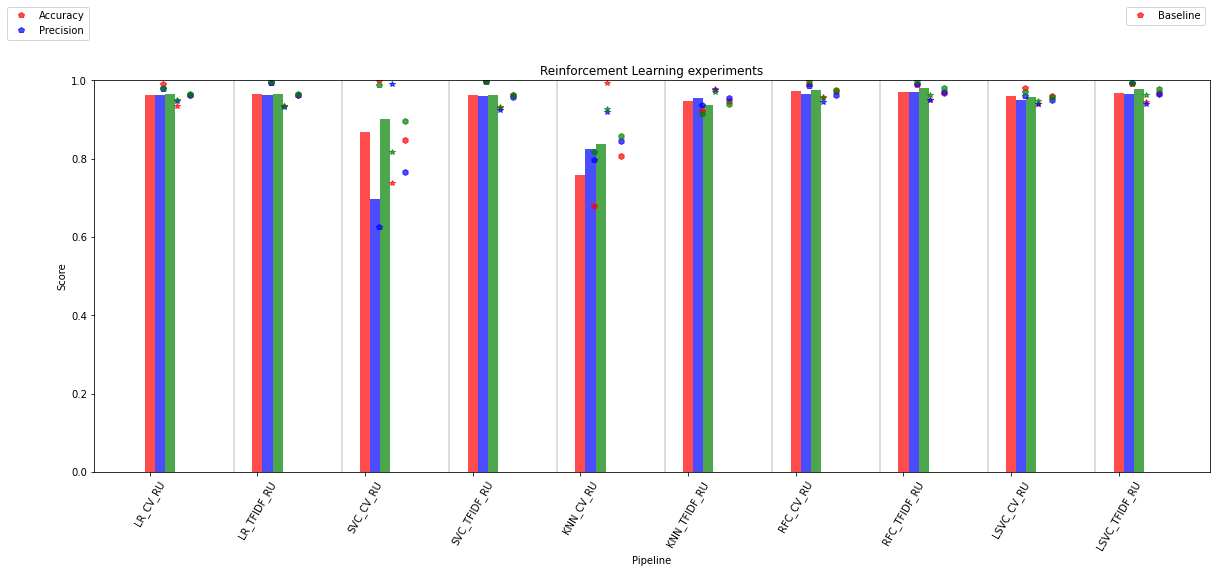

<Figure size 432x288 with 0 Axes>

In [180]:
labels = ['LR_CV_RU', 'LR_TFIDF_RU', 'SVC_CV_RU', 'SVC_TFIDF_RU', 'KNN_CV_RU', 'KNN_TFIDF_RU', 'RFC_CV_RU', 'RFC_TFIDF_RU', 'LSVC_CV_RU', 'LSVC_TFIDF_RU']
xticknum = len(labels)

y1 = []
x1 = []
i = 0
y2 = []
x2 = []
y3 = []
x3 = []

plt.figure(figsize=(20,8))
count = 0
for key in data1.keys():
    for ind in range(len(data1[key])):
        y1.append(float(data1[key][ind]))
        y2.append(float(data2[key][ind]))
        y3.append(float(data3[key][ind]))
        x1.append(i)
        x2.append(i)
        x3.append(i)
        
        if count % 4 == 0:
            plt.bar(i, float(data1[key][ind]), 3, alpha=0.7, color='red')
            plt.bar(i+3, float(data2[key][ind]), 3,  alpha=0.7, color='blue')
            plt.bar(i+6, float(data3[key][ind]), 3, alpha=0.7, color='green')
        elif count % 4 == 1:
            plt.plot(i, float(data1[key][ind]), 'p', alpha=0.7, c='red')
            plt.plot(i, float(data2[key][ind]), 'p', alpha=0.7, c='blue')
            plt.plot(i, float(data3[key][ind]), 'p', alpha=0.7, c='green')
        elif count % 4 == 2:
            plt.plot(i, float(data1[key][ind]), '*', alpha=0.7, c='red')
            plt.plot(i, float(data2[key][ind]), '*', alpha=0.7, c='blue')
            plt.plot(i, float(data3[key][ind]), '*', alpha=0.7, c='green')
        elif count % 4 == 3:
            plt.plot(i, float(data1[key][ind]), 'h', alpha=0.7, c='red')
            plt.plot(i, float(data2[key][ind]), 'h', alpha=0.7, c='blue')
            plt.plot(i, float(data3[key][ind]), 'h', alpha=0.7, c='green')
        count += 1
        i += metric_count
    i += metric_count*metric_count
#plt.show()
j = 0
for u in range(len(data1.keys())-1):
    j += metric_count*metric_count*2
    plt.axvline(x = j-metric_count*2+1, ymin = 0, ymax=1, c='lightgray')


plt.xticks(range(0, i, int(i/xticknum)), labels, rotation=60)
plt.title(category +' experiments')
plt.xlabel('Pipeline')
plt.ylabel('Score')
#plt.plot(x1, y1, 'x', label='Baseline', alpha=0.7, c='red')
#plt.plot(x2, y2, 'o', label='Negative samples', alpha=0.7, c='blue')
#plt.plot(x3, y3, 'og', label='Base structured')
#plt.tight_layout()
plt.ylim(0.0,1.0)
plt.subplots_adjust(bottom=0.2)
legend1 = plt.legend(['Baseline'], bbox_to_anchor=(0,0,1,1.2))
plt.legend(['Accuracy', 'Precision'], bbox_to_anchor=(0,0,0,1.2))
plt.gca().add_artist(legend1)
#plt.savefig("../../results/pics/"+"_".join(category.lower().split(' '))+"_negative_samples.svg")
#plt.legend(loc='upper left')
#plt.tight_layout()
plt.show()
plt.clf()